Data downloaded and read into a dataframe!


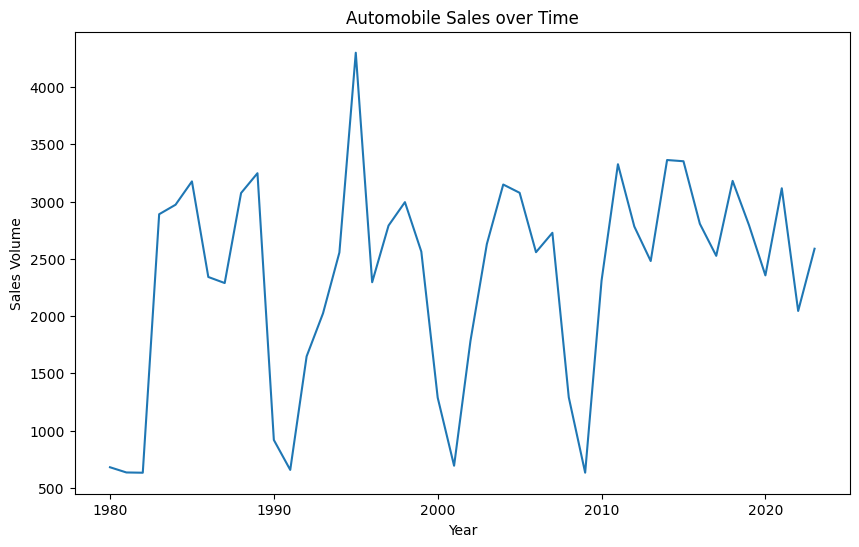

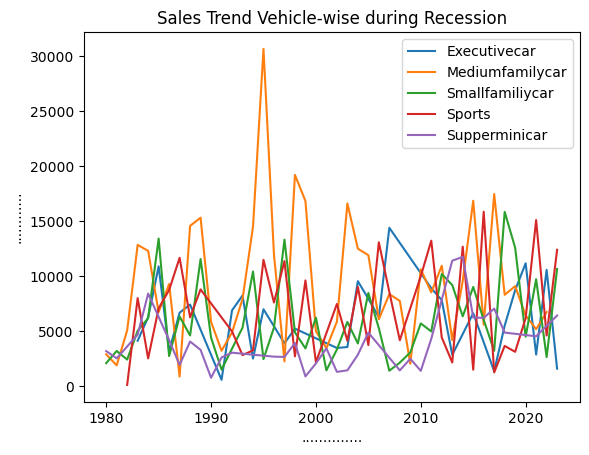

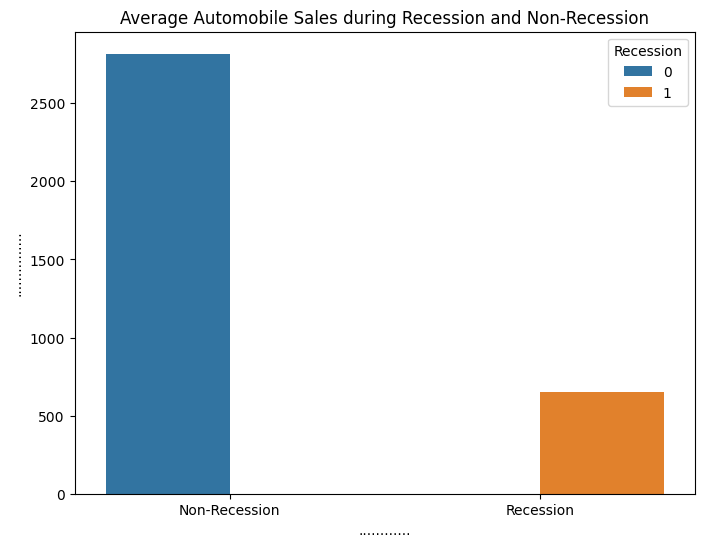

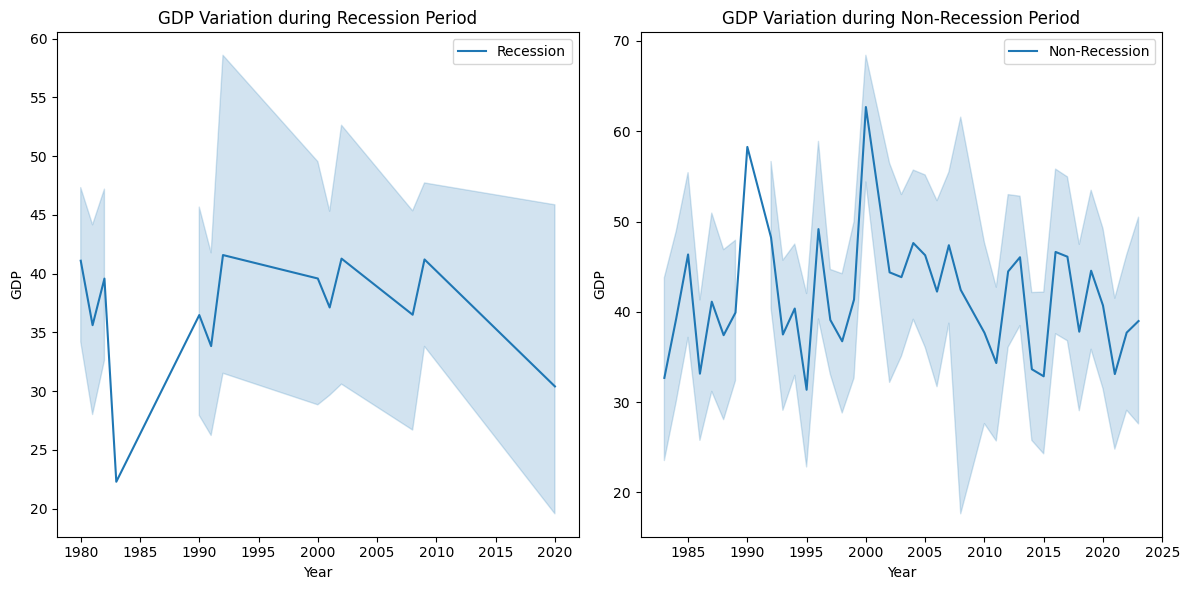

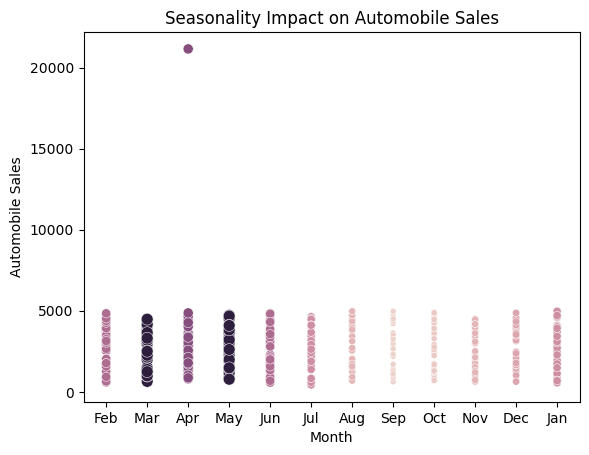

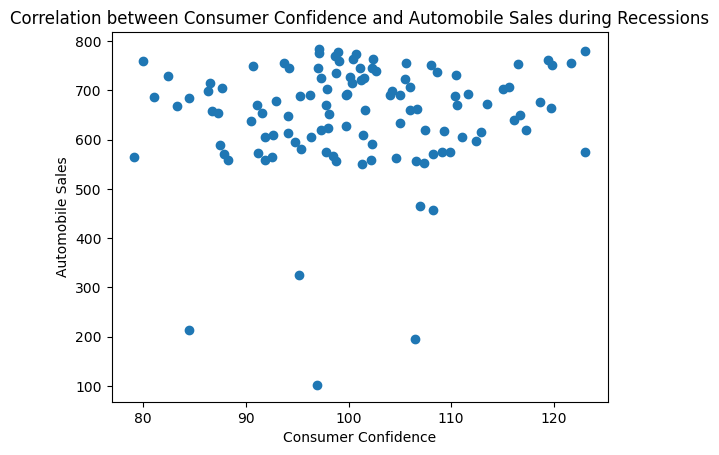

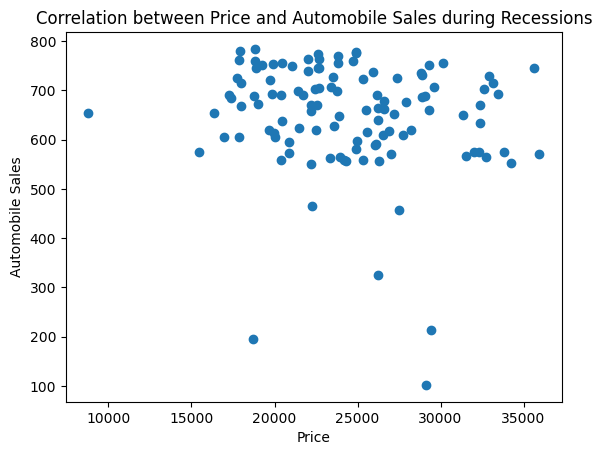

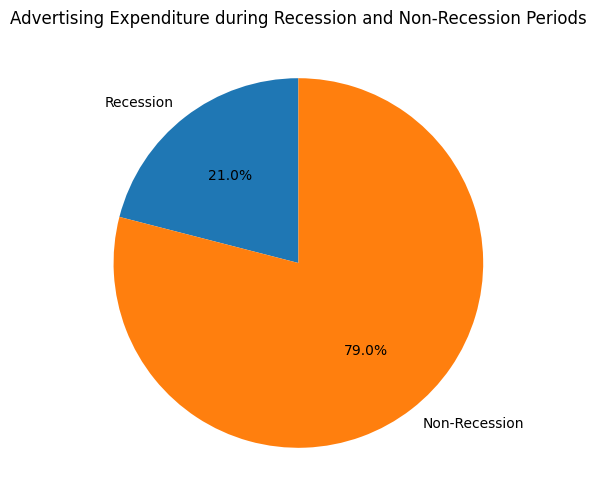

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')


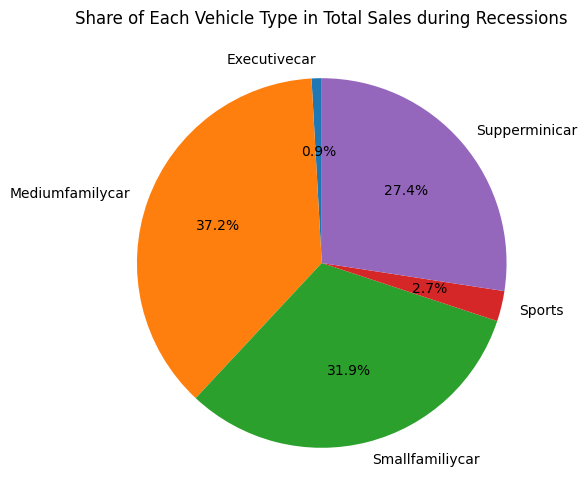

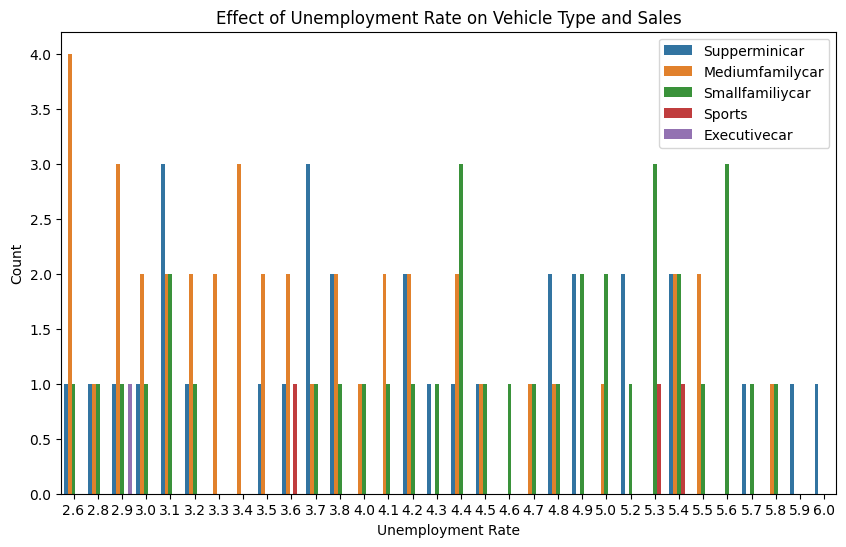

In [35]:
%pip install seaborn
%pip install folium

#Import Primary Modules:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
import pandas as pd
df = pd.read_csv(text)
print('Data downloaded and read into a dataframe!')

df.describe()
df.columns

#Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

#create data for plotting
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
#create figure
plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales over Time')
plt.show()

#Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xlabel('..............')
plt.ylabel('............')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

#Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

# Create the bar chart using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
plt.xlabel('............')
plt.ylabel('...............')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

#Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.
import matplotlib.pyplot as plt
import seaborn as sns

# Create dataframes for recession and non-recession periods
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Using the first code template with fig.add_subplot()
fig = plt.figure(figsize=(12, 6))

# Create different axes for subplotting
ax0 = fig.add_subplot(1, 2, 1)  # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2)  # add subplot 2 (1 row, 2 columns, second plot).

# Line plot for GDP during recession period
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

# Line plot for GDP during non-recession period
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()

#TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for non-recession periods
non_rec_data = df[df['Recession'] == 0]

# Extract the size for the bubble effect
size = non_rec_data['Seasonality_Weight']

# Create the Bubble plot
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, hue='Seasonality_Weight', legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality Impact on Automobile Sales')

plt.show()

#TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.

import matplotlib.pyplot as plt

# Create dataframe for recession period
rec_data = df[df['Recession'] == 1]

# Scatter plot
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

# Labels and title
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Correlation between Consumer Confidence and Automobile Sales during Recessions')

# Show the plot
plt.show()

import matplotlib.pyplot as plt

# Create dataframe for recession period
rec_data = df[df['Recession'] == 1]

# Scatter plot
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])

# Labels and title
plt.xlabel('Price')
plt.ylabel('Automobile Sales')
plt.title('Correlation between Price and Automobile Sales during Recessions')

# Show the plot
plt.show()

#Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

import matplotlib.pyplot as plt

# Filter the data
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]  # Corrected variable name here
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

plt.show()

#Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.

import matplotlib.pyplot as plt

# Filter the data
Rdata = df[df['Recession'] == 1]

# Check if the 'Sales_Volume' column exists and if there are any leading/trailing spaces
print(df.columns)

# Calculate the sales volume by vehicle type during recessions
VTsales = Rdata.groupby('Vehicle_Type')['Recession'].sum()

# Create a pie chart for the share of each vehicle type in total sales during recessions
plt.figure(figsize=(8, 6))

labels = VTsales.index
sizes = VTsales.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Share of Each Vehicle Type in Total Sales during Recessions')

plt.show()

#Develop a countplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.

import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn for visualization

# Filter the data for the recession period
data = df[df['Recession'] == 1]

# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='unemployment_rate', hue='Vehicle_Type')

# Set labels and title
plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')

# Place the legend outside the plot
plt.legend(loc='upper right')

# Show the plot
plt.show()

